In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1e0YrrMb7UHBki3l0oondjzO30yPRFABx

Downloading...
From: https://drive.google.com/uc?id=1e0YrrMb7UHBki3l0oondjzO30yPRFABx
To: /content/Honda_Data.csv
100% 814k/814k [00:00<00:00, 25.4MB/s]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - loss: 0.0447 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - loss: 0.0043 - val_loss: 9.3376e-04 - learning_rate: 0.0010
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 0.0033 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.0028 - val_loss: 3.2677e-04 - learning_rate: 0.0010
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.0027 - val_loss: 3.2242e-04 - learning_rate: 0.0010
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - loss: 0.0021 - val_loss: 3.7361e-04 - learning_rate: 0.0010
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - loss: 0.0021 - val_loss: 3.0197e-04 - learning_rate: 0.0010
Epoch 8/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 0.0020 - val_loss: 3.1010e-04 - learning_rate: 2.0000e-04
Epoch 9/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0018 - val_l

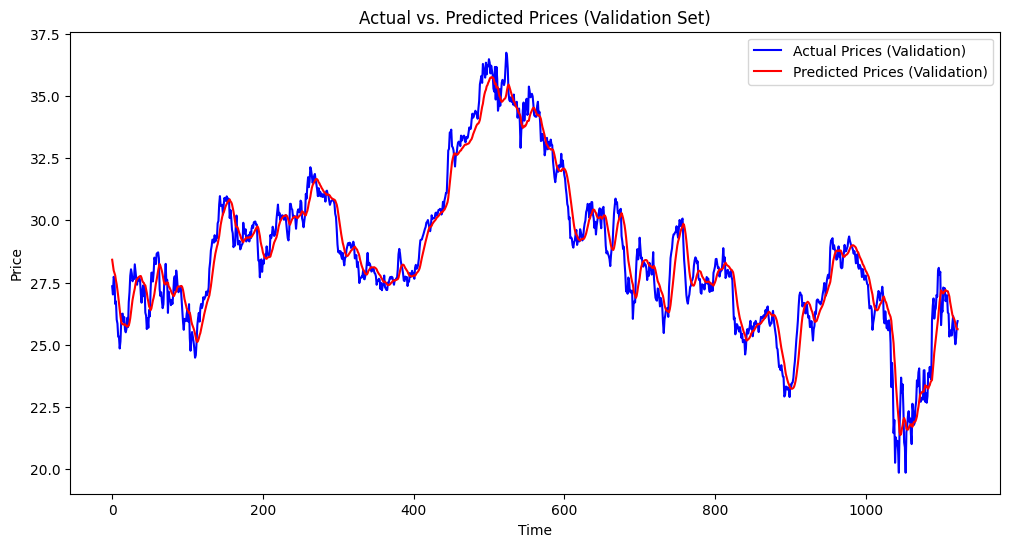

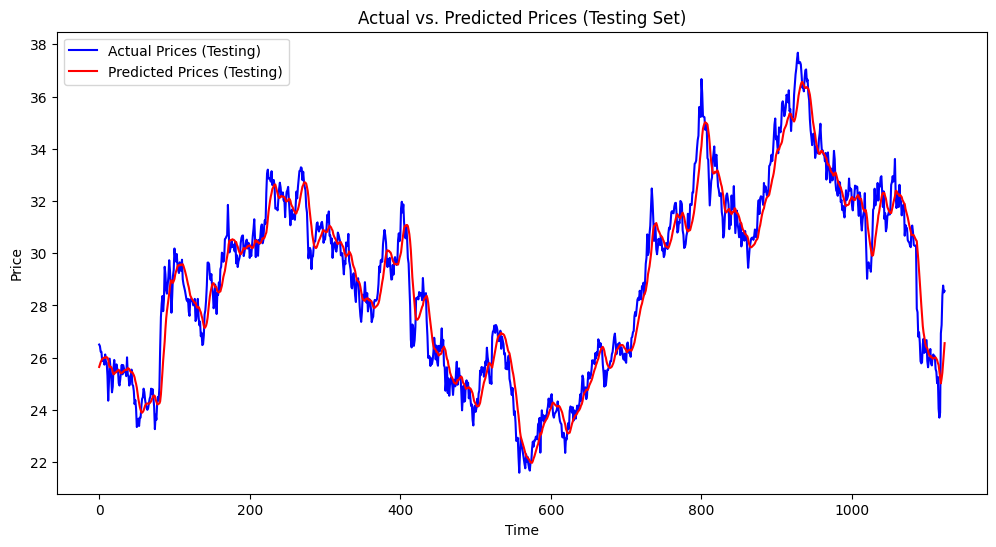

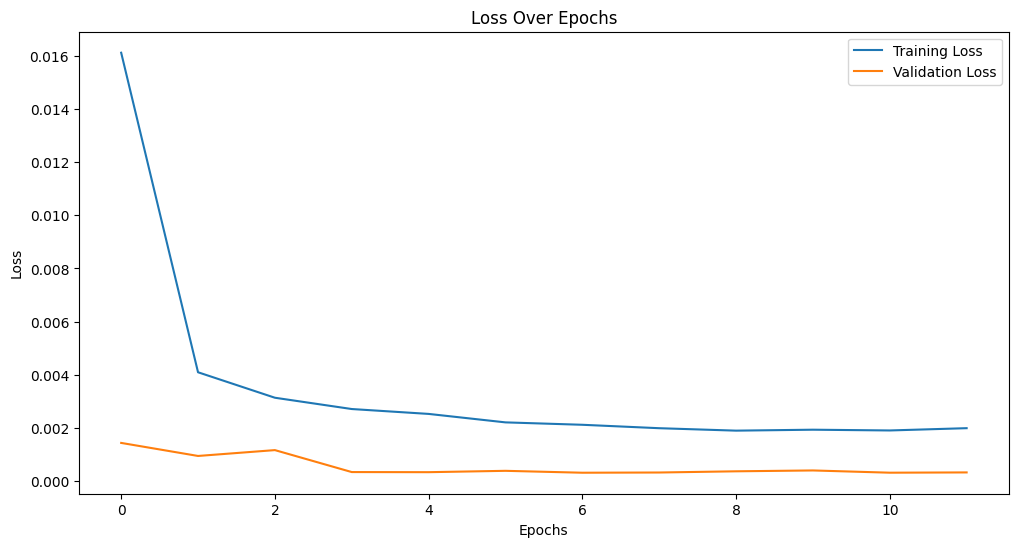

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the dataset
honda_data = pd.read_csv('/content/Honda_Data.csv')

# Use 'Close' column for prediction (target variable)
prices = honda_data['Close'].values.reshape(-1, 1)

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Create sequences for LSTM
sequence_length = 60  # Use 60 days of data to predict the next day
X, y = [], []

for i in range(sequence_length, len(prices_scaled)):
    X.append(prices_scaled[i-sequence_length:i, 0])  # Last 60 days
    y.append(prices_scaled[i, 0])  # The next day's price

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for LSTM

# Split data into training (80%), validation (10%), and testing (10%)
train_size = int(len(X) * 0.8)
val_size = int(len(X) * 0.1)

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation="relu", input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()

# Apply Early Stopping & Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model with explicit validation set
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_val, y_val), verbose=1,
                    callbacks=[early_stopping, reduce_lr])

# Predict on training, validation, and testing sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Rescale predictions and actual values
y_train_pred_rescaled = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_train_rescaled = scaler.inverse_transform(y_train.reshape(-1, 1))

y_val_pred_rescaled = scaler.inverse_transform(y_val_pred.reshape(-1, 1))
y_val_rescaled = scaler.inverse_transform(y_val.reshape(-1, 1))

y_test_pred_rescaled = scaler.inverse_transform(y_test_pred.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics for training, validation, and testing sets
r2_train = r2_score(y_train_rescaled, y_train_pred_rescaled)
mae_train = mean_absolute_error(y_train_rescaled, y_train_pred_rescaled)

r2_val = r2_score(y_val_rescaled, y_val_pred_rescaled)
mae_val = mean_absolute_error(y_val_rescaled, y_val_pred_rescaled)

r2_test = r2_score(y_test_rescaled, y_test_pred_rescaled)
mae_test = mean_absolute_error(y_test_rescaled, y_test_pred_rescaled)

# Print results
print(f"Training Results:")
print(f"R² Score: {r2_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")

print(f"\nValidation Results:")
print(f"R² Score: {r2_val:.4f}")
print(f"Mean Absolute Error (MAE): {mae_val:.4f}")

print(f"\nTesting Results:")
print(f"R² Score: {r2_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")

# Plot actual vs. predicted for validation set
plt.figure(figsize=(12, 6))
plt.plot(y_val_rescaled, label='Actual Prices (Validation)', color='blue')
plt.plot(y_val_pred_rescaled, label='Predicted Prices (Validation)', color='red')
plt.title('Actual vs. Predicted Prices (Validation Set)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot actual vs. predicted for testing set
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Prices (Testing)', color='blue')
plt.plot(y_test_pred_rescaled, label='Predicted Prices (Testing)', color='red')
plt.title('Actual vs. Predicted Prices (Testing Set)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot loss trends
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
